Melika Ahmadi Ranjbar 97521036


---
Homework 6


#Question 1

In [1]:
# -*-*-*- Imports -*-*-*- #
import numpy as np
import matplotlib.pyplot as plt


In [12]:
# -*-*-*- A -*-*-*- #

def Swish(X):
    Result = X * (1 / (1 + np.exp(-1 * X)))
    return Result

def Mish(X):
    Result = X * np.tanh(np.log(1 + np.exp(X)))
    return Result

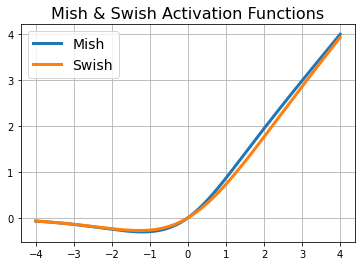

In [13]:
# Plot
x = np.linspace(-4, 4, 8000)
YMish = Mish(x)
YSwish = Swish(x)

plt.title("Mish & Swish Activation Functions", fontsize = 16)
plt.plot(x, YMish, label='Mish', linewidth = 3)
plt.plot(x, YSwish, label= 'Swish', linewidth = 3)
plt.legend(prop={'size': 14})
plt.grid()
plt.show()

In [16]:
# -*-*-*- B -*-*-*- #

def SwishDer(X):
    Result = Swish(X) + (1 / (1 + np.exp(-1 * X))) * (1 - Swish(X))
    return Result

def MishDer(X):
    Result = Mish(X) / X + (X / (1 + np.exp(-1 * X))) * pow(1 / np.cosh(np.log(1 + np.exp(X))), 2)
    return Result

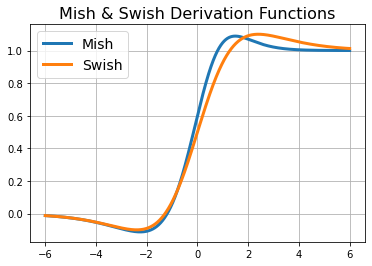

In [18]:
# Plot
x = np.linspace(-6, 6, 8000)
YMish = MishDer(x)
YSwish = SwishDer(x)

plt.title("Mish & Swish Derivation Functions", fontsize = 16)
plt.plot(x, YMish, label='Mish', linewidth = 3)
plt.plot(x, YSwish, label= 'Swish', linewidth = 3)
plt.legend(prop={'size': 14})
plt.grid()
plt.show()

#Question 3

In [83]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

from keras import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, LeakyReLU

from sklearn.utils import shuffle

In [84]:
def CreateModel(Alpha):

    Model = Sequential()
    Model.add(Conv2D(8, (7, 7)))
    Model.add(LeakyReLU(Alpha))
    Model.add(Conv2D(8, (5, 5)))
    Model.add(LeakyReLU(Alpha))
    Model.add(Flatten())
    Model.add(Dense(10, 'softmax'))

    return Model

Train Data Dimension (120000, 28, 28)
Test Data Dimension (20000, 28, 28)


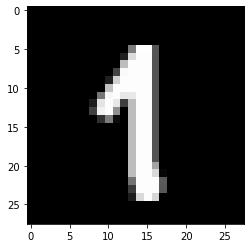

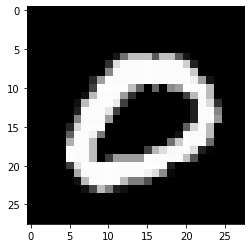

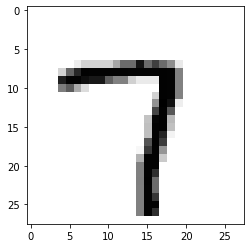

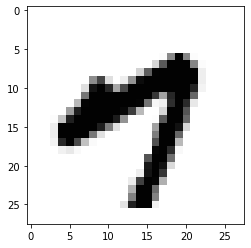

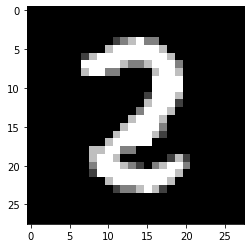

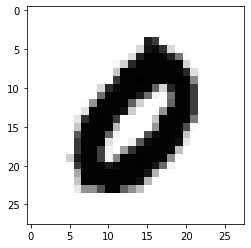

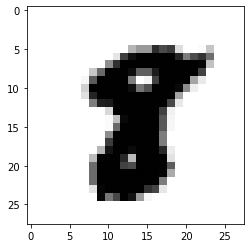

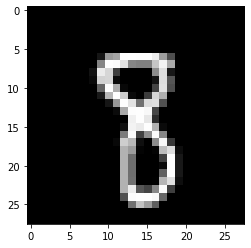

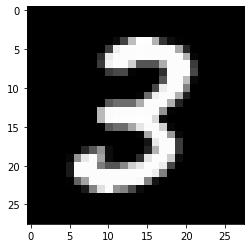

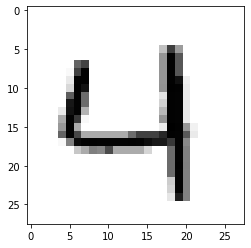

In [85]:
# Import Data
(TrainData, Label), (TestData, TestLabel) = mnist.load_data()

# Augmentation
ContrastDataTrain = 255 - TrainData
ContrastTestTrain = 255 - TestData

TrainData = np.append(TrainData, ContrastDataTrain, axis=0)
TestData = np.append(TestData, ContrastTestTrain, axis=0)

Label = np.append(Label, Label)
TestLabel = np.append(TestLabel, TestLabel)

# Shuffle
TrainData, Label = shuffle(TrainData, Label)

# Plot, Test
print('Train Data Dimension', TrainData.shape)
print('Test Data Dimension', TestData.shape)

for I in range(10):
    plt.imshow(TrainData[I], cmap='gray')
    plt.show()     

# Reshape
TrainData = TrainData.reshape(120000, 28, 28, 1)  
TestData = TestData.reshape(20000, 28, 28, 1)  

TrainData = np.true_divide(TrainData, 255)
TestData = np.true_divide(TestData, 255)


# Categorical
Label = tf.keras.utils.to_categorical(Label, num_classes=10)
TestLabel = tf.keras.utils.to_categorical(TestLabel, num_classes=10)


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
leaky_re_lu_34 (LeakyReLU)   (120000, 22, 22, 8)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
leaky_re_lu_35 (LeakyReLU)   (120000, 18, 18, 8)       0         
_________________________________________________________________
flatten_17 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_17 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

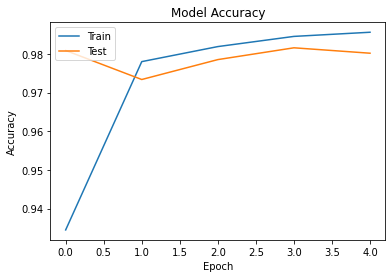

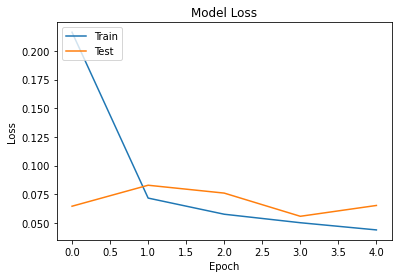

In [86]:
# Alpha = -1

Alpha = -1
# Model
Model = CreateModel(Alpha)
Model.build(TrainData.shape)

Model.summary()

Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
History = Model.fit(TrainData, Label, batch_size=128, validation_data=(TestData, TestLabel), epochs=5)

# Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
leaky_re_lu_36 (LeakyReLU)   (120000, 22, 22, 8)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
leaky_re_lu_37 (LeakyReLU)   (120000, 18, 18, 8)       0         
_________________________________________________________________
flatten_18 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_18 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

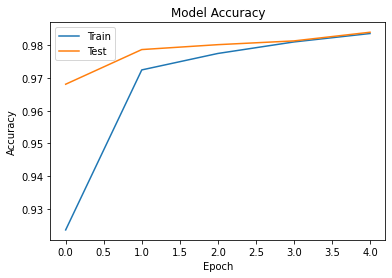

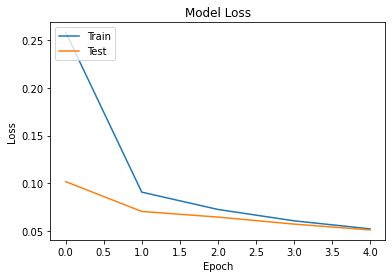

In [87]:
# Alpha = -0.5

Alpha = -0.5
# Model
Model = CreateModel(Alpha)
Model.build(TrainData.shape)

Model.summary()

Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
History = Model.fit(TrainData, Label, batch_size=128, validation_data=(TestData, TestLabel), epochs=5)

# Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
leaky_re_lu_38 (LeakyReLU)   (120000, 22, 22, 8)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (120000, 18, 18, 8)       0         
_________________________________________________________________
flatten_19 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_19 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

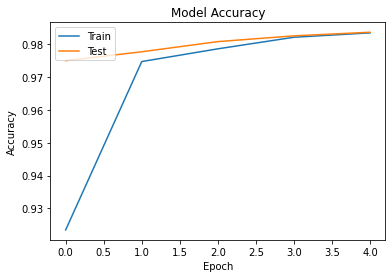

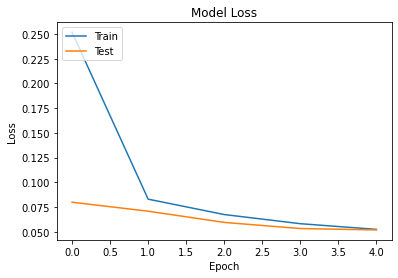

In [88]:
# Alpha = 0

Alpha = 0
# Model
Model = CreateModel(Alpha)
Model.build(TrainData.shape)

Model.summary()

Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
History = Model.fit(TrainData, Label, batch_size=128, validation_data=(TestData, TestLabel), epochs=5)

# Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (120000, 22, 22, 8)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
leaky_re_lu_41 (LeakyReLU)   (120000, 18, 18, 8)       0         
_________________________________________________________________
flatten_20 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_20 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

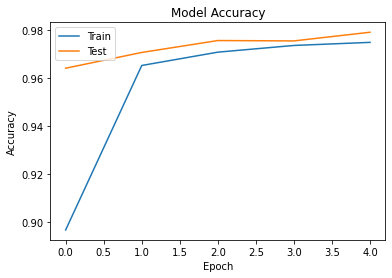

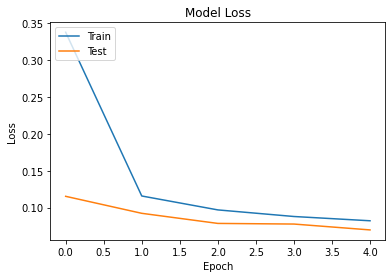

In [89]:
# Alpha = 0.5

Alpha = 0.5
# Model
Model = CreateModel(Alpha)
Model.build(TrainData.shape)

Model.summary()

Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
History = Model.fit(TrainData, Label, batch_size=128, validation_data=(TestData, TestLabel), epochs=5)

# Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (120000, 22, 22, 8)       400       
_________________________________________________________________
leaky_re_lu_42 (LeakyReLU)   (120000, 22, 22, 8)       0         
_________________________________________________________________
conv2d_49 (Conv2D)           (120000, 18, 18, 8)       1608      
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (120000, 18, 18, 8)       0         
_________________________________________________________________
flatten_21 (Flatten)         (120000, 2592)            0         
_________________________________________________________________
dense_21 (Dense)             (120000, 10)              25930     
Total params: 27,938
Trainable params: 27,938
Non-trainable params: 0
_________________________________________________

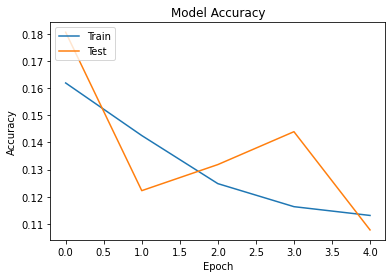

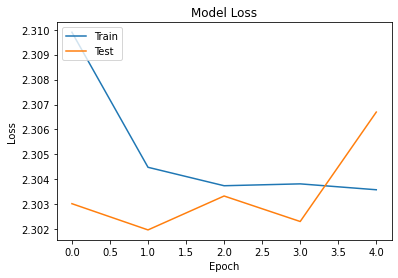

In [90]:
# Alpha = 1

Alpha = 1
# Model
Model = CreateModel(Alpha)
Model.build(TrainData.shape)

Model.summary()

Model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
History = Model.fit(TrainData, Label, batch_size=128, validation_data=(TestData, TestLabel), epochs=5)

# Accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()